In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.signal as signal
from IPython.display import Audio
import scienceplots

plt.style.use(['science','no-latex','bright'])

This file is just a quick demonstration of what to expect durint the course. The course is presented using MATLAB due to its more widespread use in the scientific community (in general).

In [2]:
# load the file
matfile = loadmat('glassDance.mat')
# this is a clip of Philip Glass, Dance VII (https://www.youtube.com/watch?v=LpewOlR-z_4)

matfile # check variables

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 21 13:57:27 2019',
 '__version__': '1.0',
 '__globals__': [],
 'glassclip': array([[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [-0.2204895 , -0.24395752],
        [-0.22491455, -0.26760864],
        [-0.22653198, -0.28924561]]),
 'srate': array([[44100]], dtype=uint16)}

In [6]:
glassclip = matfile['glassclip'] # two columns corresponding to left and right channels
srate = matfile['srate'][0][0] # sampling rate, dt

# play the music!
Audio(np.array(glassclip[:,0]), rate=srate)

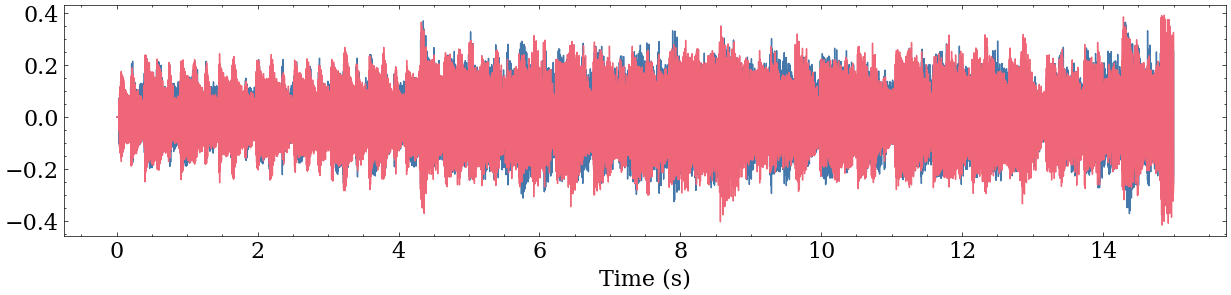

In [23]:
# some variables for convenience
numpoints = len(glassclip)
timevec = np.arange(0,numpoints)/srate

# draw the time-domain signals
plt.figure(figsize=(15, 3), dpi=100)
plt.plot(timevec,glassclip)
plt.xlabel('Time (s)')
plt.show()

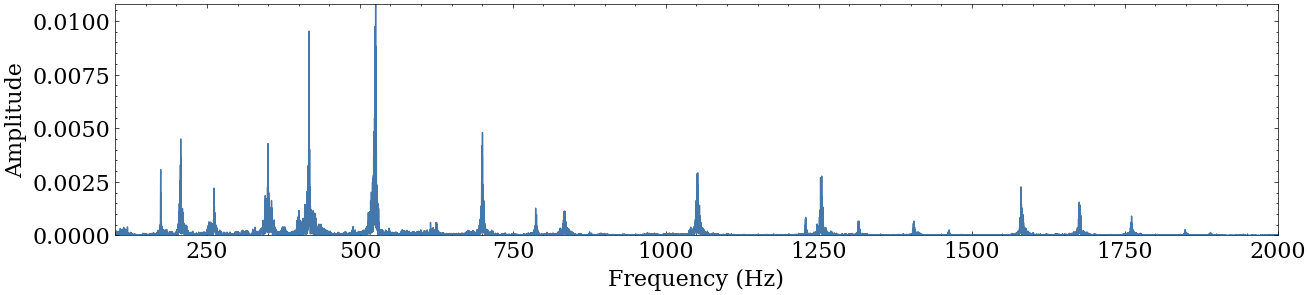

In [25]:
## static power spectrum and pick a frequency range

# inspect the power spectrum
hz = np.linspace(0,srate/2,int(np.floor(len(glassclip)/2)+1)) # frequency vector including 0
powr = abs(np.fft.fft(glassclip[:,0])/numpoints) # amplitude of spectrum (just one channel)

plt.figure(figsize=(15, 3), dpi=100)
plt.plot(hz,powr[:len(hz)]) # only the positive side
plt.xlim([100,2000])
plt.ylim([0,np.max(powr)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [27]:
# BANDPASS FILTER
# pick frequencies to filter
frange = [  300,  460 ]
# frange = [ 1000, 1100 ]
# frange = [ 1200, 1450 ]

# design an FIR1 filter
fkern = signal.firwin(2001,frange,nyq=srate/2,pass_zero=False)

# apply the filter to the signal
filtglass = np.zeros(np.shape(glassclip))
filtglass[:,0] = signal.filtfilt(fkern,1,glassclip[:,0])
filtglass[:,1] = signal.filtfilt(fkern,1,glassclip[:,1])


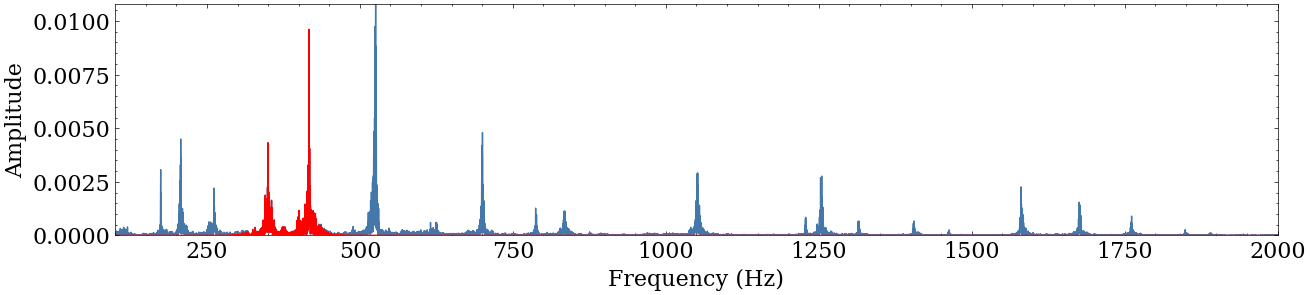

In [29]:
## plot the raw and filtered signal power spectra
powrF = abs(np.fft.fft(filtglass[:,0])/numpoints)

plt.figure(figsize=(15, 3), dpi=100)
plt.plot(hz,powr[:len(hz)])
plt.plot(hz,powrF[:len(hz)],'r')

plt.xlim([100,2000])
plt.ylim([0,np.max(powr)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

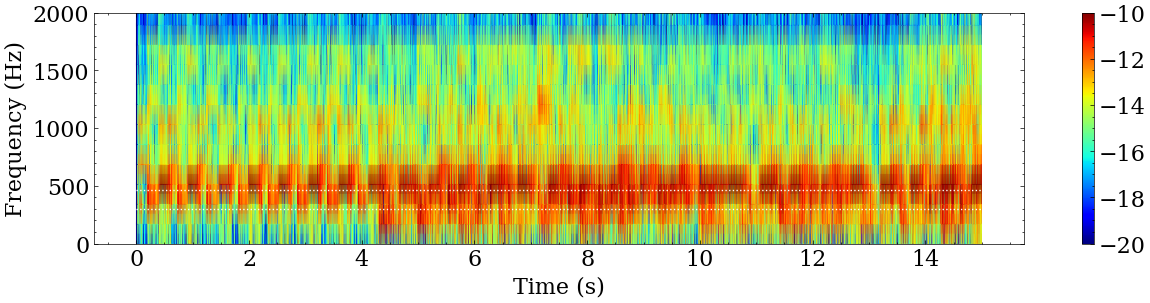

In [50]:
# plot the time-frequency response (Spectrogram)

frex,time,tf = signal.spectrogram(glassclip[:,0],window=('tukey',.25),fs=srate)

plt.figure(figsize=(15, 3), dpi=100)
plt.plot([timevec[0],timevec[-1]],[frange[0],frange[0]],'w:') # filtered region indicated between white lines
plt.plot([timevec[0],timevec[-1]],[frange[1],frange[1]],'w:')

plt.pcolormesh(time,frex,np.log(tf),vmin=-20,vmax=-10,cmap="jet",shading='gouraud')
plt.ylim([0,2000])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

In [31]:
## Play the filtered signal!
Audio(np.array(filtglass[:,0]), rate=srate)